在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [13]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
enrollments[0]
enrollments[0]['account_key']

u'448'

In [14]:
#####################################

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。

daily_engagement = read_csv('daily_engagement.csv')
project_submissions= read_csv('project_submissions.csv')

print daily_engagement[0]
print project_submissions[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## 修正数据类型

In [15]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [16]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [17]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [21]:
## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"

for de in daily_engagement:
    de['account_key'] = de['acct']
    del[de['acct']]


KeyError: 'acct'

In [22]:
## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量

def unique_acct_num(data, keyword):
    st = set()
    for dt in data:
        st.add(dt[keyword])
    return len(st)    

enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = unique_acct_num(enrollments,'account_key')

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = unique_acct_num(daily_engagement,'account_key')

submission_num_rows = len(project_submissions)
submission_num_unique_students = unique_acct_num(project_submissions,'account_key')

print enrollment_num_rows, enrollment_num_unique_students, engagement_num_rows, engagement_num_unique_students, submission_num_rows, submission_num_unique_students


1640 1302 136240 1237 3642 743


## 数据中的问题

In [23]:
daily_engagement[0]['account_key']

u'0'

## 缺失的互动（Engagement）记录

In [24]:
## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。

for enrollment in enrollments:
    student = enrollment['account_key']
    unique_de = set()
    for de in daily_engagement:
        unique_de.add(de['account_key'])
    if student not in unique_de:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## 检查更多的问题记录

In [25]:
## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）

s = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_de and enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        s += 1
s

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

## 追踪剩余的问题

In [26]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [27]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [28]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## 重新定义问题

In [29]:
## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (enrollment['cancel_date'] is None or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

In [30]:
for enrollment in non_udacity_enrollments:
    if enrollment['account_key'] == u'429':
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'429', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 120}


## 获取第1周的数据
获取第1周的数据

In [31]:
paid_students

{u'0': datetime.datetime(2015, 1, 9, 0, 0),
 u'1': datetime.datetime(2015, 5, 6, 0, 0),
 u'10': datetime.datetime(2014, 11, 10, 0, 0),
 u'100': datetime.datetime(2015, 2, 5, 0, 0),
 u'1000': datetime.datetime(2015, 7, 11, 0, 0),
 u'1001': datetime.datetime(2015, 7, 9, 0, 0),
 u'1002': datetime.datetime(2015, 5, 7, 0, 0),
 u'1007': datetime.datetime(2015, 5, 12, 0, 0),
 u'1009': datetime.datetime(2014, 12, 5, 0, 0),
 u'101': datetime.datetime(2014, 11, 12, 0, 0),
 u'1011': datetime.datetime(2015, 4, 8, 0, 0),
 u'1013': datetime.datetime(2015, 4, 1, 0, 0),
 u'1014': datetime.datetime(2015, 7, 18, 0, 0),
 u'1015': datetime.datetime(2014, 12, 3, 0, 0),
 u'1019': datetime.datetime(2014, 11, 11, 0, 0),
 u'102': datetime.datetime(2014, 11, 10, 0, 0),
 u'1022': datetime.datetime(2015, 8, 20, 0, 0),
 u'1028': datetime.datetime(2015, 8, 21, 0, 0),
 u'1029': datetime.datetime(2015, 5, 12, 0, 0),
 u'103': datetime.datetime(2015, 1, 7, 0, 0),
 u'1030': datetime.datetime(2015, 5, 11, 0, 0),
 u'1031'

In [32]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [33]:
## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

def first_week_records(data):
    records = []
    for dt in data:
        for key in paid_students:
            if (dt['account_key'] == key and within_one_week(paid_students[key], dt['utc_date'])):
                records.append(dt)
    return records

paid_engagement_in_first_week = first_week_records(daily_engagement)

len(paid_engagement_in_first_week)
paid_engagement_in_first_week[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

## Exploring Student Engagement

In [34]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

def group_data(data, key_word):
    group_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_word]
        group_data[key].append(data_point)
    return group_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [35]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）

def sum_grouped_items(grouped_data, field_name):
    sum_grouped_items = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        sum_grouped_items[key] = total
    return sum_grouped_items

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


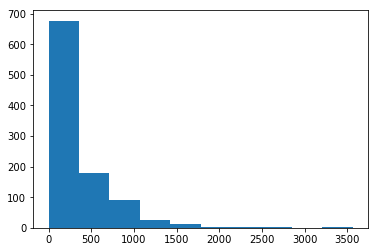

In [57]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 汇总和描述关于教室所花时间的数据

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)
    
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

## 纠错现有的数据分析代码

In [37]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。

student_with_max_minutes = None
max_minute = 0

for student, total_minute in total_minutes_by_account.items():
    if total_minute > max_minute:
        max_minute = total_minute
        student_with_max_minutes = student
        
max_minute

3564.7332644989997

In [38]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

In [39]:
for student in paid_students.keys():
    if student == student_with_max_minutes:
        print paid_students[student]
        break

2015-07-09 00:00:00


## 第1周完成的课程数（Lessons）

In [40]:
#####################################
#                 9                 #
#####################################

## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码

total_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(total_lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [41]:
# 第一周学生完成项目数的平均值、标准差、最小值、最大值

total_projects_by_account = sum_grouped_items(engagement_by_account, 'projects_completed')
describe_data(total_projects_by_account.values())

Mean: 0.00603015075377
Standard deviation: 0.0894641732031
Minimum: 0
Maximum: 2


In [42]:
# 第一周学生访问课程数的平均值、标准差、最小值和最大值

total_courses_visited_by_account = sum_grouped_items(engagement_by_account, 'num_courses_visited')
describe_data(total_courses_visited_by_account.values())

Mean: 3.97889447236
Standard deviation: 3.5912451871
Minimum: 0
Maximum: 25


## 第1周的访问次数

In [50]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。

for engagement in paid_engagement_in_first_week:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0

totalday_classroom_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(totalday_classroom_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## 区分项目通过的学生

In [45]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

# 给定account_key，判断是否通过了特定项目

def passing_or_not(account_key):
    project_result = defaultdict(list)
    for ps in project_submissions:
        if (account_key == ps['account_key'] and ps['lesson_key'] in subway_project_lesson_keys):
             project_result[account_key].append(ps['assigned_rating'])
    if ('PASSED'in project_result[account_key] or 'DISTINCTION' in project_result[account_key]) :
        return True
    else:
        return False

passing_or_not('0')

True

In [46]:
def passing_records(data):
    passing_records = []
    for pe in data:
        if passing_or_not(pe['account_key']):
            passing_records.append(pe)
    return passing_records

def non_passing_records(data):
    non_passing_records = []
    for pe in data:
        if not passing_or_not(pe['account_key']):
            non_passing_records.append(pe)
    return non_passing_records

passing_engagement = passing_records(paid_engagement_in_first_week)
non_passing_engagement = non_passing_records(paid_engagement_in_first_week)

print len(passing_engagement), len(non_passing_engagement)
print len(paid_engagement_in_first_week)

4527 2392
6919


In [47]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [48]:
pass_subway_project = set()

for pe in project_submissions:
    lesson = pe['lesson_key']
    rating = pe['assigned_rating']
    
    if (lesson in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(pe['account_key'])
        
len(pass_subway_project)

653

In [49]:
passing_engagement = []
non_passing_engagement = []

for pe in paid_engagement_in_first_week:
    if pe['account_key'] in pass_subway_project:
        passing_engagement.append(pe)
    else:
        non_passing_engagement.append(pe)

print len(passing_engagement), len(non_passing_engagement)

4527 2392


## 对比两组学生数据

In [52]:
######################################
#                 12                 #
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。

# 创建存储通过学生的学生、记录字典
passing_engagement_by_account = group_data(passing_engagement, 'account_key')

# 创建存储未通过学生的学生、记录字典
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

# 教室的访问时间

print '通过的教室的访问时间数据：\n'
total_passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited').values()
describe_data(total_passing_minutes)

print '\n'
print '未通过的教室的访问时间数据：\n'
total_non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited').values()
describe_data(total_non_passing_minutes)


 通过的教室的访问时间数据：

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


未通过的教室的访问时间数据：

Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [53]:
# 课程完成数

print '通过的课程完成数数据：\n'
total_passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed').values()
describe_data(total_passing_lessons)

print '\n'
print '未通过的课程完成数数据：\n'
total_non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed').values()
describe_data(total_non_passing_lessons)

通过的课程完成数数据：

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


未通过的课程完成数数据：

Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


In [54]:
# 访问天数

print '通过的访问天数数据：\n'
total_passing_visit = sum_grouped_items(passing_engagement_by_account, 'has_visited').values()
describe_data(total_passing_visit)

print '\n'
print '未通过的访问天数数据：\n'
total_non_passing_visit = sum_grouped_items(non_passing_engagement_by_account, 'has_visited').values()
describe_data(total_non_passing_visit)

通过的访问天数数据：

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


未通过的访问天数数据：

Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## 制作直方图

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


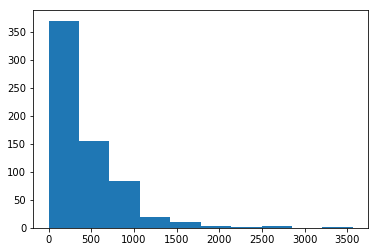

In [59]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。

# 通过的学员教室访问时间数据
describe_data(total_passing_minutes)

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


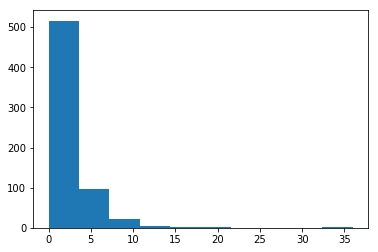

In [60]:
# 通过的学员完成课程数数据
describe_data(total_passing_lessons)

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


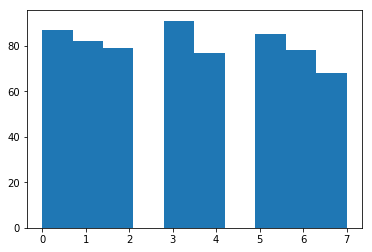

In [61]:
# 通过的学员访问教室天数数据
describe_data(total_passing_visit)

Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


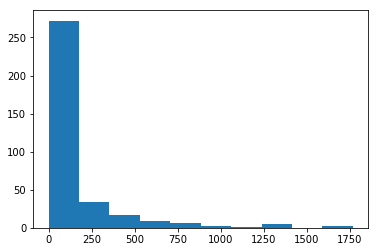

In [63]:
# 未通过的学员教室访问时间数据
describe_data(total_non_passing_minutes)

Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


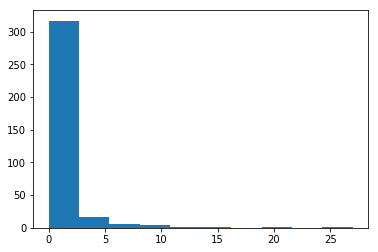

In [64]:
# 未通过的学员完成课程数数据
describe_data(total_non_passing_lessons)

Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


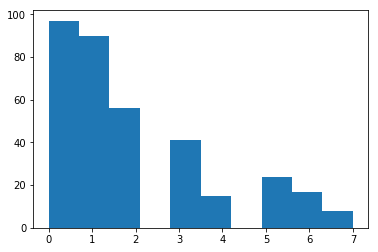

In [65]:
# 未通过的学员访问教室天数数据
describe_data(total_non_passing_visit)

## 改进图表及分享发现

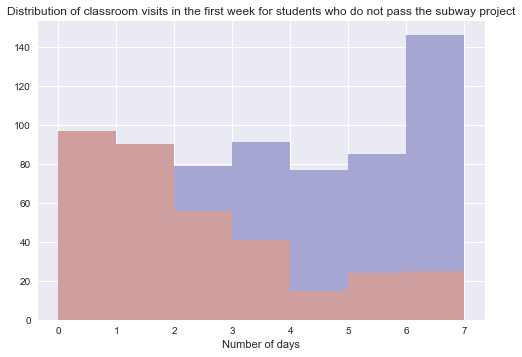

In [98]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。

import seaborn as sns

# 改进通过的学生第一周访问教室天数的直方图

plt.hist(total_passing_visit, bins = 7, color='#A6A6D2')
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' +  
          'for students who pass the subway project')

plt.hist(total_non_passing_visit, bins = 7, color='#CF9E9E')
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' +  
          'for students who do not pass the subway project')

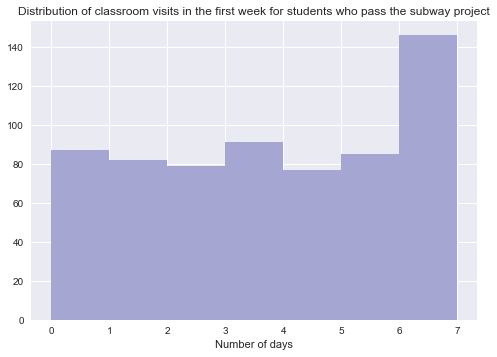

In [97]:
plt.hist(total_passing_visit, bins = 7, color = '#A6A6D2')
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' +  
          'for students who pass the subway project')

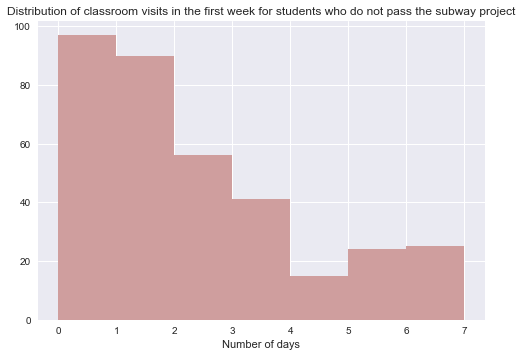

In [84]:
plt.hist(total_non_passing_visit, bins = 7, color='#CF9E9E')
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' +  
          'for students who do not pass the subway project')